In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-stock-data-from-moneycontrol/stock_data_0.json


In [2]:
df=pd.read_json('/kaggle/input/indian-stock-data-from-moneycontrol/stock_data_0.json')

In [3]:
df.head()

,NAME,TYPE,COST,STRENGTH,WEAKNESS,OPPORTUNITIES,THREATS,P_LOW,P_HIGH,YEARLY_LOW,YEARLY_HIGH
0,A & M Febcon Ltd.,Miscellaneous,0.95,Company with Zero Promoter Pledge,Low Piotroski Score : Companies with weak fina...,Positive Breakout First Resistance ( LTP > R1),No Threat for this stock,0.87,0.95,0.85,2.36
1,A F Enterprises Ltd.,Finance - Investment,5.55,Growth in Net Profit with increasing Profit Ma...,Inefficient use of shareholder funds - ROE dec...,Turnaround companies- loss to profit QoQ,No Threat for this stock,5.21,5.70,4.30,23.25
2,A and M Jumbo Bags Ltd.,Containers & Packaging,NaN,Company with Zero Promoter Pledge,Inefficient use of capital to generate profits...,Highest Recovery from 52 Week Low,No Threat for this stock,NaN,NaN,NaN,NaN
3,A G Universal Ltd.,Trading,NaN,Annual Net Profits improving for last 2 years,Companies with High Debt,Highest Recovery from 52 Week Low,No Threat for this stock,0.00,0.00,32.50,119.95
4,A K Spintex Ltd.,Textiles & Apparel,138.00,"Strong Momentum: Price above short, medium and...",Decline in Net Profit with falling Profit Marg...,Stock with Low PE (PE < = 10),No Threat for this stock,131.05,138.45,72.25,162.00


In [4]:
df.isnull().sum()

NAME                0
TYPE             3289
COST             4320
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW            3246
P_HIGH           3246
YEARLY_LOW       3297
YEARLY_HIGH      3297
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9543 entries, 0 to 9542
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           9543 non-null   object 
 1   TYPE           6254 non-null   object 
 2   COST           5223 non-null   float64
 3   STRENGTH       9543 non-null   object 
 4   WEAKNESS       9543 non-null   object 
 5   OPPORTUNITIES  9543 non-null   object 
 6   THREATS        9543 non-null   object 
 7   P_LOW          6297 non-null   float64
 8   P_HIGH         6297 non-null   float64
 9   YEARLY_LOW     6246 non-null   float64
 10  YEARLY_HIGH    6246 non-null   float64
dtypes: float64(5), object(6)
memory usage: 894.7+ KB


In [6]:
df['TYPE'].value_counts()

TYPE
Miscellaneous                      340
Finance - Investment               315
Textiles & Apparel                 295
Trading                            261
Finance - NBFC                     246
                                  ... 
Fertilisers                          1
Telecommunications - Service         1
Cement - Major                       1
Machine Tools                        1
Others-Industrial Gases & Fuels      1
Name: count, Length: 273, dtype: int64

In [7]:
df['TYPE']=df['TYPE'].fillna('Miscellaneous')

In [8]:
df['COST'].unique()

array([  0.95,   5.55,    nan, ..., 534.8 , 764.85, 159.85])

In [9]:
df['COST'].value_counts()

COST
0.00      324
10.00      37
0.19       20
3.61       10
1.05        9
         ... 
673.95      1
5.69        1
138.60      1
896.50      1
159.85      1
Name: count, Length: 3481, dtype: int64

In [10]:
df['COST']=df['COST'].fillna(131.721426)

In [11]:
df['P_LOW'].unique()

array([  0.87,   5.21,    nan, ...,   8.09, 159.85, 137.95])

In [12]:
df['P_LOW']=df['P_LOW'].fillna(461.594043)

In [13]:
df['P_HIGH']=df['P_HIGH'].fillna(df['P_HIGH'].mean())

In [14]:
df['YEARLY_LOW']=df['YEARLY_LOW'].fillna(df['YEARLY_LOW'].mean())

In [15]:
df['YEARLY_HIGH']=df['YEARLY_HIGH'].fillna(df['YEARLY_HIGH'].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9543 entries, 0 to 9542
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           9543 non-null   object 
 1   TYPE           9543 non-null   object 
 2   COST           9543 non-null   float64
 3   STRENGTH       9543 non-null   object 
 4   WEAKNESS       9543 non-null   object 
 5   OPPORTUNITIES  9543 non-null   object 
 6   THREATS        9543 non-null   object 
 7   P_LOW          9543 non-null   float64
 8   P_HIGH         9543 non-null   float64
 9   YEARLY_LOW     9543 non-null   float64
 10  YEARLY_HIGH    9543 non-null   float64
dtypes: float64(5), object(6)
memory usage: 894.7+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['STRENGTH']=le.fit_transform(df['STRENGTH'])
df['WEAKNESS']=le.fit_transform(df['WEAKNESS'])
df['OPPORTUNITIES']=le.fit_transform(df['OPPORTUNITIES'])
df['THREATS']=le.fit_transform(df['THREATS'])

In [19]:
df['TYPE']=le.fit_transform(df['TYPE'])

In [20]:
final_df=df.drop(['NAME'],axis=1)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9543 entries, 0 to 9542
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TYPE           9543 non-null   int64  
 1   COST           9543 non-null   float64
 2   STRENGTH       9543 non-null   int64  
 3   WEAKNESS       9543 non-null   int64  
 4   OPPORTUNITIES  9543 non-null   int64  
 5   THREATS        9543 non-null   int64  
 6   P_LOW          9543 non-null   float64
 7   P_HIGH         9543 non-null   float64
 8   YEARLY_LOW     9543 non-null   float64
 9   YEARLY_HIGH    9543 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 820.1 KB


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

In [23]:
models={
                "Random Forest":RandomForestRegressor(n_estimators=50),
                "Decision Tree":DecisionTreeRegressor(),
                "Gradient Boosting":GradientBoostingRegressor(),
                "Linear Regression":LinearRegression(),
                "K-Neighbours Regressor":KNeighborsRegressor(),
                "XGBClassifier":XGBRegressor(),
                "CatBoosting Regressor":CatBoostRegressor(verbose=False),
                "AdaBoost Regressor":AdaBoostRegressor(),
            }

In [24]:
x=final_df.drop(['COST'],axis=1)
y=final_df['COST']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {"model": model, "r2": r2, "predictions": y_pred}

# Print results
for model_name, result in results.items():
    print(f"{model_name}: R-squared = {result['r2']}")

Random Forest: R-squared = 0.9133659038347431
Decision Tree: R-squared = 0.8345809972830552
Gradient Boosting: R-squared = 0.9083460655884464
Linear Regression: R-squared = 0.03551949074489469
K-Neighbours Regressor: R-squared = 0.8824585868253052
XGBClassifier: R-squared = 0.8644452147193252
CatBoosting Regressor: R-squared = 0.8918232198792863
AdaBoost Regressor: R-squared = 0.7675706485026088


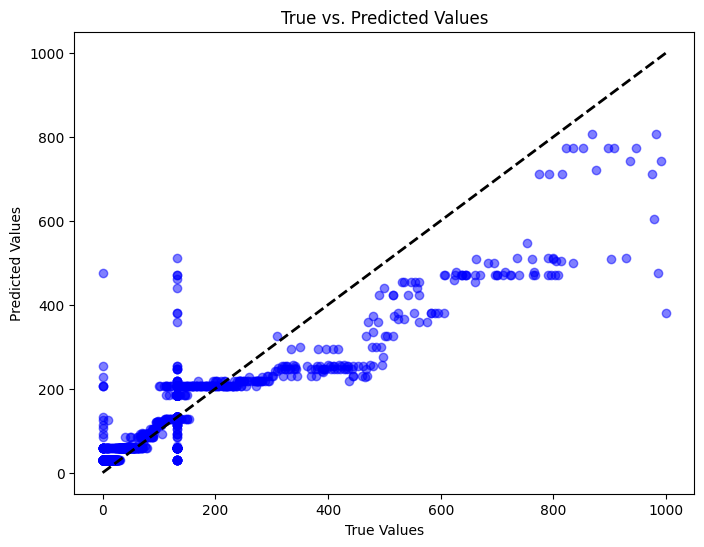

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

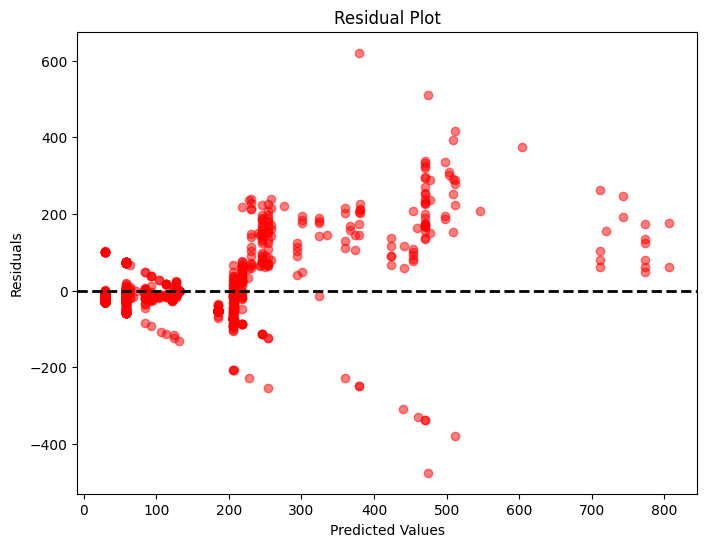

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--', lw=2)  # Horizontal line at y=0
plt.show()

##THUS I CAN SAY THAT MY MODEL IS NOT PERFECTLY FIT AND IT NEEDS IMPROVEMENT .